# CMSC320 Final Tutorial
## By Jacob Linden

## Introduction

Data science is a cutting edge field in a world that is becoming ever reliant on computers and data. In order to compete in an increasingly competitive, global world, harnessing the power of data can provide many new and amazing uses to the world. 

Data science is formally defined as the application of computational and statistical techniques to address or gain insight into some prolem in the real world. Data science crosses a wide range of disciplines but generally can be generally divided into a few steps in referred to as the data science pipeline.  

Data Science Pipeline:
1. Data Collection
2. Data Processing
3. Exploratory Analysis and Visualization
4. Hypothesis Testing and Machine Learning
5. Insight and Policy Decision


## Tutorial Content

In this tutorial we will choose a sample data set to run through the entire pipeline and highlight some specific insights we can learn through using data science. There are many great datasets available to choose from. After choosing a dataset we will download and extract the data into a Pandas dataframe and then see what we can learn from the data. We can predict what further we can learn using hypothesis testing and machine learning before we conclude with our overall findings.

Tutorial Sections:
* [Library Imports](#s0)
* [Data Collection](#s1)
* [Data Processing](#s2)
* [Exploratory Analysis and Visualization](#s3)
* [Hypothesis Testing and Machine Learning](#s4)
* [Summary](#s5)



<a id='s0'></a>

## Library Imports
These libraries will be necessary for this tutorial:
1. [Pandas](http://pandas.pydata.org/)
2. [Matplotlib](https://matplotlib.org/)
3. [Numpy](http://www.numpy.org/)
4. [ggplot](http://ggplot.yhathq.com/)
5. [sklearn](http://scikit-learn.org/stable/)

Other Helpful Libraries:
1. [Requests](http://docs.python-requests.org/en/master/)
2. [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/)

Below we are the necessary imports, located all together at the beginning.

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ggplot import *
from sklearn import linear_model
from sklearn import feature_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

<a id='s1'></a>

## Data Collection
Before we can collect any data we need to choose a dataset to use for this tutorial. After viewing over a list of datasets found at the [Center for Machine Learning and Intelligent Systems](http://archive.ics.uci.edu/ml/datasets.html?area=&att=&format=&numAtt=&numIns=&sort=attup&task=reg&type=&view=table), the dataset I chose was this one on [student performance](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset). This dataset was chosen because conceptually the bike sharing data is very approachable which will make analysis a bit more understandable than a very mathmatical or medical dataset.

Bike sharing is a growing global business to encourage a healthier and more environmentally friendly travel experience. Bike sharing company data has been provided in day.csv which breaks down the companies ride counts along with the date and weather information. 

In general there are five ways to download a dataset:
1. Direct download from local storage
2. Generate locally
3. Query from database
4. Query from an api
5. Scrape data from webpage

For our sample dataset we will be downloading and using the data which has already been downloaded locally.

This statement below will read the locally stored csv file and load it into a pandas dataframe. The csv is a essentially a list of separate entriers of data which is comma-separated. A pandas dataframe allows easy access and manipulation of the data in order to analyze the information in as straight forward a manor as possible.

In [83]:
data = pd.read_csv("day.csv", sep=',')

Here we can take a look at a few sample rows in the dataframe by using the head() function.

In [84]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Here we can see that the data looks good and has been read in correctly from the csv file.

The data collection stage is finished and now the data-processing stage is next.

<a id='s2'></a>

## Data Processing
The data processing stage is the next step of the data science pipeline. The main purpose of this stage is to prepare the data to be analyzed. 

Things to look for:
* Is the data tidy? 
* Is the data minimal?
* Is the data normalized?
* Is the data complete?

Pandas is the library which we use predominantly to interact with the data as pandas allows easy data alignment in order to structure the data into rows and columns (attributes). 

In [85]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


As we can see each row corresponds with a specific example and each column a specific attribute. This is generally a tidy dataset which is a desireable trait as every attribute except the date is the same data type which is good practice.  Additionally all of the columns in this dataset are related to a similar topic.

Here is a description of each of the attributes:

* instant : record index
* dteday : date
* season : season (1:springer, 2:summer, 3:fall, 4:winter)
* yr : year (0: 2011, 1:2012)
* mnth : month ( 1 to 12)
* hr : hour (0 to 23)
* holiday : weather day is holiday or not (0:not holiday, 1:holiday)
* weekday : day of the week
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
* weathersit :
    * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp : Normalized temperature in Celsius. 
* atemp: Normalized feeling temperature in Celsius. 
* hum: Normalized humidity. The values are divided to 100 (max)
* windspeed: Normalized wind speed. The values are divided to 67 (max)
* casual: count of casual users
* registered: count of registered users
* cnt: count of total rental bikes including both casual and registered

Conveniently this dataset already has had a few of the values normalized. To normalize data is to set all of the values of an attribute to a range between zero and one. This is done by dividing all of the values by the mean value for that category. This allows the smaller number to show in a simple manor how the data compares to the average. 

Here the weather-related terms have alreayd been normalized for us.

One aspect where this dataset could improve is that there are alot of attributes and some of them are similar with redundant or irrelevant information. We want to minimize the data we are working with so below I will remove a few of the extraneous attributes.

In [86]:
data = data.drop('instant', 1)
data = data.drop('windspeed', 1)
data = data.drop('atemp', 1)
data = data.drop('casual', 1)
data = data.drop('registered', 1)

data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,1600


Here is our reduced, cleaner dataset.

The final step to processing the data is to check if there is any missing data in the table and if so try to impute data and complete the dataset. 

Data can be misisng from a dataset for a variety of reasons which are difficult to know. Depending on the data, a possible solution is to remove all rows with null values or setting all null values to zero. This dataset of bike sharing data is not missing any data.

In [87]:
total_rows = data.count()
data = data.dropna()
adjusted_rows = data.count()

diff = total_rows - adjusted_rows
print diff

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
cnt           0
dtype: int64


The above statement shows that the dataset did not have any nan values in the table as zero rows were removed from running the dropna() method. This method removes all of the rows where data is missing. This approach works well when missing data is infrequenty but is most of the rows are missing data, you do not want to remove all of them but rather find a way to estimate the data.

This sample bike sharing data is all finished being processed and is ready to be analyzed.

<a id='s3'></a>

## Exploratory Analysis and Visualization

The following stage of the data science pipeline is the first where you get to delve deep into the data, searching for interesting artifacts or relationships in the data.

An easy first step for the analysis of the dataset would be do do a basic statistical analysis, calculating the mean, median, and stand deviation for relevant attributes. Pandas provides a few built in functions which are incredibly useful in this regard.

In [88]:
data.mean()

season           2.496580
yr               0.500684
mnth             6.519836
holiday          0.028728
weekday          2.997264
workingday       0.683995
weathersit       1.395349
temp             0.495385
hum              0.627894
cnt           4504.348837
dtype: float64

In [89]:
data.median()

season           3.000000
yr               1.000000
mnth             7.000000
holiday          0.000000
weekday          3.000000
workingday       1.000000
weathersit       1.000000
temp             0.498333
hum              0.626667
cnt           4548.000000
dtype: float64

The median and mean data is unsupririsingly very similar which makes sense for such a large dataset.

In [90]:
data.std()

season           1.110807
yr               0.500342
mnth             3.451913
holiday          0.167155
weekday          2.004787
workingday       0.465233
weathersit       0.544894
temp             0.183051
hum              0.142429
cnt           1937.211452
dtype: float64

Stand deviation gives a little more information as a small standard deviation shows that a attribute tends to result in similar values and a larger one means the values tend to be more varied. The standard deviation shows have far the average attribute was from the mean value. Most of the above values are very small except the standard deviation for the daily rider count which largely varies with a standard deviation of nearly 2000.

In [91]:
data.skew()

season       -0.000384
yr           -0.002742
mnth         -0.008149
holiday       5.654224
weekday       0.002742
workingday   -0.793147
weathersit    0.957385
temp         -0.054521
hum          -0.069783
cnt          -0.047353
dtype: float64

The skew function shows that most of the data has no strong skew except the holiday attribute and the weatherit attribute. 

Now that we have done a basic statistical analysis of this data it is possible that we can learn a little more from the data by using some visualiizations.

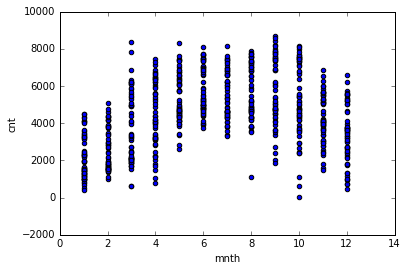

In [92]:
data.plot(kind='scatter', y='cnt', x='mnth')
plt.show()

The above plot is a scatter plot of rider count by month. Months 1-12 correlate with January-December. The major information that I can get from this plot is that ridership seems decreased in the colder winter months. This scatter plot loses some detail but there is a similar and improved version which shows more information called a violin plot.

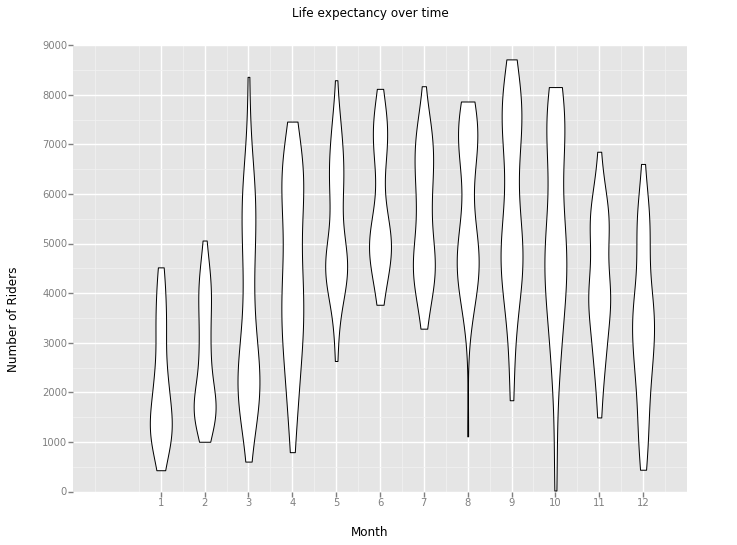

<ggplot: (8789273916453)>

In [93]:
ggplot(aes(x='mnth', y='cnt'), data=data) +\
    geom_violin() +\
    labs(title="Life expectancy over time",
         x = "Month",
         y = "Number of Riders")

This second plot shows a more detailed representation of the ridership as the shape of these violin plots allows an easy visual represntation of the frequency of each of the ridership totals by month.


In [94]:
lmodel = linear_model.LinearRegression()
xList = data['mnth']
yList = data['cnt'].tolist()
lmodel.fit(xList.values.reshape(len(xList), 1), yList)
model1 = lmodel
print lmodel.coef_

[ 157.12299279]


The above value is the slope of the linear regression line which shows that as the year progresses the ridership increases on average.

Another interesting look we can take into the data is seeing the impact which holidays impact ridership versus non-holiays and also workdays versus weekends.

In [95]:
holiday_data = data.loc[data['holiday'] == 1]
no_holiday_data = data.loc[data['holiday'] == 0]
workday_data = data.loc[data['workingday'] == 0]
non_workday_data = data.loc[data['workingday'] == 1]

holiday_data.mean()

season           2.428571
yr               0.523810
mnth             6.904762
holiday          1.000000
weekday          1.809524
workingday       0.000000
weathersit       1.285714
temp             0.465012
hum              0.614704
cnt           3735.000000
dtype: float64

In [96]:
no_holiday_data.mean()

season           2.498592
yr               0.500000
mnth             6.508451
holiday          0.000000
weekday          3.032394
workingday       0.704225
weathersit       1.398592
temp             0.496283
hum              0.628284
cnt           4527.104225
dtype: float64

<a id='s4'></a>

Based on a comparison of the mean values, overall holidays have lower ridrship by a small amount than non-holidays. This is overall a little surprising because my assumtption was that there are more riders on days with no work. Let's compare weekend versus workdays.

In [97]:
workday_data.mean()

season           2.476190
yr               0.502165
mnth             6.549784
holiday          0.090909
weekday          2.891775
workingday       0.000000
weathersit       1.346320
temp             0.481213
hum              0.622800
cnt           4330.168831
dtype: float64

In [98]:
non_workday_data.mean()['cnt']

4584.8199999999997

Overall the workday versus non-workday count difference appears much smaller which suggests that there is not a very large difference between ridership on weekends versus weekdays comapred to holidays versus non-holidays. Lastly lets plot these average counts together to get the full picture.

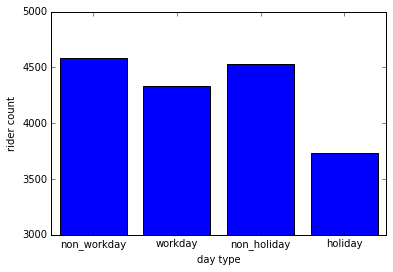

In [99]:
means = []
means.append(non_workday_data.mean()['cnt'])
means.append(workday_data.mean()['cnt'])
means.append(no_holiday_data.mean()['cnt'])
means.append(holiday_data.mean()['cnt'])
labels = ['non_workday', 'workday', 'non_holiday', 'holiday']
plt.bar(range(len(means)),means, align='center')
plt.xticks(range(len(means)), labels)
plt.ylabel('rider count')
plt.xlabel('day type')
plt.ylim(3000,5000)
plt.show()

Overall our previous findings seem to be coroborated by these bar charts which show that holidays have significantly less riders than other days, which seem to have similar ridership.

## Hypothesis Testing and Machine Learning

The next step of the data science pipeline is the hypothesis testing and machine learning section. Generally speaking machine learning allows for the classification or prediction of data based on the other data available. For example a machine learning algorithm may be able to gain insight into a question like, "based on the temperature and the month predict the number of riders that day" or "based on the number of riders and the temperature predict if the day is a workday or not". 

More generally speaking Machine Learning allows us to create a linear model to classify input data by creating a model based on the data. There are various mechanisms to do this and this tutorial will go through a few of those mechanisms.

A machine learning problem can be broken up into three primary parts:
1. What is the hypothesis function?
2. What is the loss function?
3. How do we solve the optimization function?

A hypothesis function is a basic premise which is being challenged or tested by the output of the machine learning algorithm execution. The sample dataset will use a hypothesis function that the combination of ridership and temperature has no impact on if the day is a workday or not.

A loss function is a function which can be used to calculate the distance of the machine learning predictions from the actual result. There are multiple versions of loss functions each with their own pro's and con's, but the main few are squared loss, 0-1 loss, hinge loss and exponential loss.

There are multiple approaches the solving these sort of machine learning problems but I will choose two separate ML algorithms and try both.

In [100]:
def decisionTreeBestDepth(X, Y):
    maxDepth = 10
    trees = []
    scores = []
    for i in range(maxDepth):
        tree = DecisionTreeClassifier(max_depth=i+1)
        tree.fit(X, Y)
        trees.append(tree)
        scores.append(tree.score(X, Y))
    bestIndex = np.argmax(scores) 
    bestTree = trees[bestIndex]
    return (bestIndex+1, bestTree) # Returns tuple (depth, TreeClassifier)

A decision tree is a machine learning algorithm where a series of questions is posed to the data which ideally each split the data in half until you reach a prediction/classification end node. This sort of algorithm depends heavily on the maxDepth value equals how many questions a single running of the algorithm can ask of the dataset.

The above implementation of decision tree tries a few difference depth choices and chooses the one with the best score.

In [101]:
def kNNBestK(X, Y):
    maxK = 100
    classifiers = []
    scores = []
    for i in range(maxK):
        neighbor = KNeighborsClassifier(n_neighbors=i+2) # start at 2
        neighbor.fit(X, Y)
        classifiers.append(neighbor)
        scores.append(neighbor.score(X, Y))
    bestIndex = np.argmax(scores) 
    bestKNN = classifiers[bestIndex]
    return (bestIndex+2, bestKNN)

KNN or K-nearest neighbors approach is a different style of algorithm where the algorithm predicts the value of a datapoint by using the average classification of the K-nearest datapoints. This is good for geometrically separated data that may not be linearlly separable.

In [107]:
scores_knn =  []
scores_tree = []

for i in range(20):
    train, test = train_test_split(data, test_size = 0.2)

    x_test = test[['temp', 'cnt']]
    y_test = test['workingday']

    x_train = train[['temp', 'cnt']]
    y_train = train['workingday']

    bestDepth, tree = decisionTreeBestDepth(x_train, y_train)
    bestK, knn = kNNBestK(x_train, y_train)
    scores_tree.append(tree.score(x_test, y_test))
    scores_knn.append(knn.score(x_test, y_test))

print 'Tree Score', np.mean(scores_tree)
print 'KNN Score', np.mean(scores_knn)

Tree Score 0.654081632653
KNN Score 0.589795918367


So overall both of these classifiers work very weakly, meaning that they provided consistent greater than 50% predictions, but they are not much better. There are two possible reasons for this. The first is that there is not a strong correlation between the chosen variables and the predicted workingday value. The second is that the classifiers chosen were not ideal for the dataset.

On average the decision tree performed better than the KNN on the data which to mean suggests that the data was mixed together and KNN was not able to use the spatial data to provide a good prediction of the value. 

Overall it seems to me that while there is only a week correlation between temperature, ridership and working days, because these two ML algorithms are able to find a greater than 50% solution, the hypothesis above holds.

<a id='s5'></a>

## Summary

In essence the beauty of what machine learning offers us is insight and information about data which is not otherwise available at face value. Sometimes there is hidden information in the data which takes a mathematical analysis to find out. Just like the bike ridership company which relies on user data in order to provide a better service, the use of data in all aspects of the world, from medicine to business, can allow better to service to consumers and better profits for the company.

While human beings are good at gaining intution about smaller datasets, when it comes to large data with thousands or more datapoints humans are not so good and computers are more powerful.

In the modern world of information and computers data is extremely powerful. The data science pipeline allows the average person, business or university the power to draw impactful conclusions from their data.